# BATTLE OF THE NEIGHBORHOODS

## Introduction

Toronto and Vancouver have become popular destinations for Asian immigrants looking to relocate in Canada. As we have already explored Toronto in the prior assignment, we will now explore urban areas in British Columbia, particularly around Vancouver, and find the highest-rated Indian restaurants using the Foursquare API.


### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
!pip install geocoder
import geocoder
import os
!pip install folium
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

     |████████████████████████████████| 102kB 7.5MB/s ta 0:00:011
     |████████████████████████████████| 102kB 8.1MB/s ta 0:00:011
Libraries imported.


### Importing Requests and extracting postal codes for urban areas in British Columbia

In [2]:
import requests
import csv
from bs4 import BeautifulSoup

res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))

In [4]:
pd.set_option('max_colwidth', 800)

#### Postal Codes are in the first 3 characters of each cell of the table object 

In [5]:
df[0][0][0][0:3]

'V1A'

#### Extracting the postal codes and the neighborhood into a dataframe

In [3]:
vancouver ={}

In [4]:
for i in range(0, len(df[0].columns)):
    for j in range(0, len(df[0][i])):
        vancouver[df[0][i][j][0:3]]=df[0][i][j][3:] # Assigning postal code and Neighborhood to a dictionary 

In [ ]:
# Converting Dictionary into a Dataframe

In [5]:
df = pd.DataFrame(vancouver.items(),  columns=['Postal Code', 'Neighborhood'])

### Resultant Dataframe

In [6]:
df

,Postal Code,Neighborhood
0,V1A,Kimberley
1,V1B,VernonEast
2,V1C,Cranbrook
3,V1E,Salmon Arm
4,V1G,Dawson Creek
5,V1H,VernonWest
6,V1J,Fort St. John
7,V1K,Merritt
8,V1L,Nelson
9,V1M,Langley TownshipNorth


In [7]:
postal_codes = df['Postal Code'].values

In [9]:
CLIENT_ID = 'XRQC2X3B1LEQ5OQT5JIPB2YP2QHEQ53O0XSQMCZL1OMOFAMQ'
CLIENT_SECRET = 'NQMWFNYPZKSX2D1PAZUWYSOFXP24BCHO33FKK250TBZW50DK'
API_KEY = 'd81586d5707f448e89f23450fe404003'
VERSION = '20200401' # Foursquare API version

### Using the OpenCage geocoder to get back longitude and latitude, and adding these to the dataframe

In [10]:
import json

latitudes = [] # Initializing the latitude array
longitudes = [] # Initializing the longitude array

for postal_code in postal_codes : 
    place_name = postal_code + " Vancouver, Canada" # Formats the place name
    url = 'https://api.opencagedata.com/geocode/v1/json?q={}&key={}'.format(place_name, API_KEY) # Gets the proper url to make the API call
    obj = json.loads(requests.get(url).text) # Loads the JSON file in the form of a python dictionary
    
    results = obj['results'] # Extracts the results information out of the JSON file
    lat = results[0]['geometry']['lat'] # Extracts the latitude value
    lng = results[0]['geometry']['lng'] # Extracts the longitude value
    
    latitudes.append(lat) # Appending to the list of latitudes
    longitudes.append(lng) # Appending to the list of longitudes
    
df['Latitude'] = latitudes
df['Longitude'] = longitudes

In [11]:
vancouver = df

In [12]:
vancouver #Appended Latitude and Longitude for all postal codes in urban areas of BC

,Postal Code,Neighborhood,Latitude,Longitude
0,V1A,Kimberley,49.249660,-123.119340
1,V1B,VernonEast,49.249660,-123.119340
2,V1C,Cranbrook,49.249660,-123.119340
3,V1E,Salmon Arm,49.249660,-123.119340
4,V1G,Dawson Creek,49.249660,-123.119340
5,V1H,VernonWest,49.249660,-123.119340
6,V1J,Fort St. John,49.249660,-123.119340
7,V1K,Merritt,50.112200,-120.794200
8,V1L,Nelson,49.249660,-123.119340
9,V1M,Langley TownshipNorth,49.166100,-122.579200


# Q1: Visualizing all zipcodes in urban British Columbia on the Folium Map

In [130]:


# Vancouver latitude and longitude using Google search
vancity_lat = 49.2827
vancity_lng = -123.1207

# Creates map of Toronto using latitude and longitude values
map_vancouver = folium.Map(location=[vancity_lat, vancity_lng], zoom_start=10)

# Add markers to map
for lat, lng, postal_code, neighborhood in zip(vancouver['Latitude'], vancouver['Longitude'], vancouver['Postal Code'], vancouver['Neighborhood']):
    label = '{}, {}'.format(neighborhood, postal_code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)  
    
map_vancouver

# Q2: Getting locations for Indian Cuisine

#### We will utilize the Foursquare API, as done previously in the course

In [14]:

def get_category_type(row):
    try:
        categories_list = row['Category']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [33]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [16]:
def get_venue_details(venue_id):
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [34]:
CLIENT_ID = 'XRQC2X3B1LEQ5OQT5JIPB2YP2QHEQ53O0XSQMCZL1OMOFAMQ'
CLIENT_SECRET = 'NQMWFNYPZKSX2D1PAZUWYSOFXP24BCHO33FKK250TBZW50DK'
API_KEY = 'd81586d5707f448e89f23450fe404003'
VERSION = '20200401' # Foursquare API version

### Number of Indian restaurants in each zipcode

In [17]:
column_names=['Postal Code', 'Neighborhood', 'ID','Name']
bc_indian_restaurants=pd.DataFrame(columns=column_names)
count=1
for row in vancouver.values.tolist():
    Postal_Code, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_restaurants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(vancouver),')','Indian Resturants in '+Neighborhood+', '+Postal_Code+':'+str(len(indian_restaurants)))
    for restaurant_detail in indian_restaurants.values.tolist():
        id, name , category=restaurant_detail
        bc_indian_restaurants = bc_indian_restaurants.append({'Postal Code': Postal_Code,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 180 ) Indian Resturants in Kimberley, V1A:1
( 2 / 180 ) Indian Resturants in VernonEast, V1B:1
( 3 / 180 ) Indian Resturants in Cranbrook, V1C:1
( 4 / 180 ) Indian Resturants in Salmon Arm, V1E:1
( 5 / 180 ) Indian Resturants in Dawson Creek, V1G:1
( 6 / 180 ) Indian Resturants in VernonWest, V1H:1
( 7 / 180 ) Indian Resturants in Fort St. John, V1J:1
( 8 / 180 ) Indian Resturants in Merritt, V1K:0
( 9 / 180 ) Indian Resturants in Nelson, V1L:1
( 10 / 180 ) Indian Resturants in Langley TownshipNorth, V1M:0
( 11 / 180 ) Indian Resturants in Castlegar, V1N:1
( 12 / 180 ) Indian Resturants in KelownaEast, V1P:1
( 13 / 180 ) Indian Resturants in Trail, V1R:1
( 14 / 180 ) Indian Resturants in KamloopsSouthwest, V1S:1
( 15 / 180 ) Indian Resturants in VernonCentral, V1T:1
( 16 / 180 ) Indian Resturants in KelownaNorth, V1V:1
( 17 / 180 ) Indian Resturants in KelownaSouthwest, V1W:0
( 18 / 180 ) Indian Resturants in KelownaEast Central, V1X:1
( 19 / 180 ) Indian Resturants in KelownaCen

### Dataframe with the names of the restaurants

In [75]:
bc_indian_restaurants.head(10)

,Postal Code,Neighborhood,ID,Name
0,V1A,Kimberley,5674aec9498e6800815c3598,Vij's
1,V1B,VernonEast,5674aec9498e6800815c3598,Vij's
2,V1C,Cranbrook,5674aec9498e6800815c3598,Vij's
3,V1E,Salmon Arm,5674aec9498e6800815c3598,Vij's
4,V1G,Dawson Creek,5674aec9498e6800815c3598,Vij's
5,V1H,VernonWest,5674aec9498e6800815c3598,Vij's
6,V1J,Fort St. John,5674aec9498e6800815c3598,Vij's
7,V1L,Nelson,5674aec9498e6800815c3598,Vij's
8,V1N,Castlegar,5674aec9498e6800815c3598,Vij's
9,V1P,KelownaEast,5674aec9498e6800815c3598,Vij's


### Plotting a graph of zipcodes with the most number of Indian restaurants

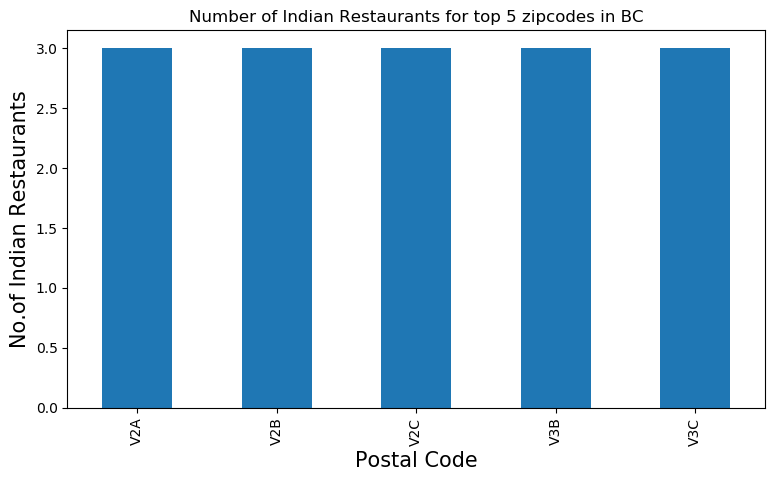

In [103]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Restaurants for top 5 zipcodes in BC')
#On x-axis
plt.xlabel('Postal Code', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Restaurants', fontsize=15)
#giving a bar plot
bc_indian_restaurants.groupby('Postal Code')['ID'].count().nlargest(5).plot(kind='bar')

#displays the plot
plt.show()

In [20]:
postal_codes_top5 = bc_indian_restaurants.groupby('Postal Code')['ID'].count().nlargest(5)

In [101]:
postal_codes_top5

Postal Code
V5W    4
V5X    4
V2A    3
V2B    3
V2C    3
Name: ID, dtype: int64

In [21]:
top5 = postal_codes_top5.keys().values.tolist()

In [53]:
bc_indian_restaurants[bc_indian_restaurants['Postal Code'].isin(top5)]

,Postal Code,Neighborhood,ID,Name
17,V2A,Penticton,52ae4f3c11d227ba4f4b055a,Indian Roti Kitchen
18,V2A,Penticton,5674aec9498e6800815c3598,Vij's
19,V2A,Penticton,4bf04d2051f2c9b68d78f192,Chutney Villa
20,V2B,KamloopsNorthwest,52ae4f3c11d227ba4f4b055a,Indian Roti Kitchen
21,V2B,KamloopsNorthwest,5674aec9498e6800815c3598,Vij's
22,V2B,KamloopsNorthwest,4bf04d2051f2c9b68d78f192,Chutney Villa
23,V2C,KamloopsCentral and Southeast,52ae4f3c11d227ba4f4b055a,Indian Roti Kitchen
24,V2C,KamloopsCentral and Southeast,5674aec9498e6800815c3598,Vij's
25,V2C,KamloopsCentral and Southeast,4bf04d2051f2c9b68d78f192,Chutney Villa
32,V3B,Port CoquitlamCentral,52ae4f3c11d227ba4f4b055a,Indian Roti Kitchen


### Using the Foursquare API to get the associated data for each restaurant

In [60]:
# Getting the associates Likes, Ratings and Tips for each of these indian resturants
column_names=['Postal Code', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
bc_indian_restaurants_stats=pd.DataFrame(columns=column_names)
count=1

for row in bc_indian_restaurants.values.tolist():
    Postal_Code, Neighborhood, ID, Name=row
    try:
        venue_details = get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=', ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(bc_indian_restaurants),')','processed')
    bc_indian_restaurants_stats = bc_indian_restaurants_stats.append({'Postal Code': Postal_Code,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID   Name  Likes  Rating  Tips
0  5674aec9498e6800815c3598  Vij's     76     8.8    17
( 1 / 88 ) processed
                         ID   Name  Likes  Rating  Tips
0  5674aec9498e6800815c3598  Vij's     76     8.8    17
( 2 / 88 ) processed
                         ID   Name  Likes  Rating  Tips
0  5674aec9498e6800815c3598  Vij's     76     8.8    17
( 3 / 88 ) processed
                         ID   Name  Likes  Rating  Tips
0  5674aec9498e6800815c3598  Vij's     76     8.8    17
( 4 / 88 ) processed
                         ID   Name  Likes  Rating  Tips
0  5674aec9498e6800815c3598  Vij's     76     8.8    17
( 5 / 88 ) processed
                         ID   Name  Likes  Rating  Tips
0  5674aec9498e6800815c3598  Vij's     76     8.8    17
( 6 / 88 ) processed
                         ID   Name  Likes  Rating  Tips
0  5674aec9498e6800815c3598  Vij's     76     8.8    17
( 7 / 88 ) processed
                         ID   Name  Likes  Rating  Tips
0  5674aec949

In [62]:
bc_indian_restaurants_stats.head(10)

,Postal Code,Neighborhood,ID,Name,Likes,Rating,Tips
0,V1A,Kimberley,5674aec9498e6800815c3598,Vij's,76,8.8,17
1,V1B,VernonEast,5674aec9498e6800815c3598,Vij's,76,8.8,17
2,V1C,Cranbrook,5674aec9498e6800815c3598,Vij's,76,8.8,17
3,V1E,Salmon Arm,5674aec9498e6800815c3598,Vij's,76,8.8,17
4,V1G,Dawson Creek,5674aec9498e6800815c3598,Vij's,76,8.8,17
5,V1H,VernonWest,5674aec9498e6800815c3598,Vij's,76,8.8,17
6,V1J,Fort St. John,5674aec9498e6800815c3598,Vij's,76,8.8,17
7,V1L,Nelson,5674aec9498e6800815c3598,Vij's,76,8.8,17
8,V1N,Castlegar,5674aec9498e6800815c3598,Vij's,76,8.8,17
9,V1P,KelownaEast,5674aec9498e6800815c3598,Vij's,76,8.8,17


#### Likes and Tips are given a default data type of string, which we will change to float for comparison purposes

In [67]:
bc_indian_restaurants_stats['Likes']=bc_indian_restaurants_stats['Likes'].astype('float64')

In [64]:
bc_indian_restaurants_stats['Tips']=bc_indian_restaurants_stats['Tips'].astype('float64')

#### Most Liked Indian Restaurant

In [68]:
bc_indian_restaurants_stats.iloc[bc_indian_restaurants_stats['Likes'].idxmax()]

Postal Code                                                   V5N
Neighborhood    Vancouver(South Grandview-Woodland / NE Kensin...
ID                                       4aa95279f964a520125320e3
Name                                               House of Dosas
Likes                                                          88
Rating                                                        7.9
Tips                                                           33
Name: 54, dtype: object

#### Highest Rated Indian Restaurant

In [69]:
bc_indian_restaurants_stats.iloc[bc_indian_restaurants_stats['Rating'].idxmax()]

Postal Code                          V1A
Neighborhood                   Kimberley
ID              5674aec9498e6800815c3598
Name                               Vij's
Likes                                 76
Rating                               8.8
Tips                                  17
Name: 0, dtype: object

#### Indian restaurant with the most tips

In [70]:
bc_indian_restaurants_stats.iloc[bc_indian_restaurants_stats['Tips'].idxmax()]

Postal Code                                                   V5N
Neighborhood    Vancouver(South Grandview-Woodland / NE Kensin...
ID                                       4aa95279f964a520125320e3
Name                                               House of Dosas
Likes                                                          88
Rating                                                        7.9
Tips                                                           33
Name: 54, dtype: object

#### Averages of Indian restaurant ratings for each Neighborhood

In [71]:
bc_indian_restaurants_stats=bc_indian_restaurants_stats.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
bc_indian_restaurants_stats.columns=['Neighborhood','Average Rating']

In [74]:
bc_indian_restaurants_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
61,Winfield,8.8
21,Prince GeorgeEast Central,8.8
23,Prince GeorgeSouth,8.8
24,Prince GeorgeWest Central,8.8
51,VernonEast,8.8
26,Quesnel,8.8
27,Salmon Arm,8.8
60,Williams Lake,8.8
58,Whistler,8.8
30,SurreyLower East,8.8


In [105]:
bc_indian_restaurants_stats=bc_indian_restaurants_stats[bc_indian_restaurants_stats['Average Rating']>=8.0]

#### Q2: Neighborhoods with average ratings of Indian restaurants > 8.0

In [106]:
bc_indian_restaurants_stats

,Neighborhood,Average Rating
1,Campbell RiverCentral,8.80
2,Castlegar,8.80
3,Cranbrook,8.80
4,Dawson Creek,8.80
5,Fort St. John,8.80
6,KamloopsCentral and Southeast,8.40
7,KamloopsNorthwest,8.40
8,KamloopsSouthwest,8.80
9,KelownaCentral,8.80
10,KelownaEast,8.80


#### Merging the dataframe with longitude and latitude with the average ratings

In [107]:
bc_indian_restaurants_stats=pd.merge(bc_indian_restaurants_stats,vancouver, on='Neighborhood')

In [109]:
bc_indian_restaurants_stats=bc_indian_restaurants_stats[['Postal Code','Neighborhood','Latitude','Longitude','Average Rating']]

### Number of Chinese restaurants in each zipcode

In [114]:
column_names=['Postal Code', 'Neighborhood', 'ID','Name']
bc_chinese_restaurants=pd.DataFrame(columns=column_names)
count=1
for row in vancouver.values.tolist():
    Postal_Code, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    chinese_restaurants=venues[venues['Category']=='Chinese Restaurant']   
    print('(',count,'/',len(vancouver),')','Chinese Resturants in '+Neighborhood+', '+Postal_Code+':'+str(len(chinese_restaurants)))
    for restaurant_detail in chinese_restaurants.values.tolist():
        id, name , category=restaurant_detail
        bc_chinese_restaurants = bc_chinese_restaurants.append({'Postal Code': Postal_Code,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 180 ) Chinese Resturants in Kimberley, V1A:4
( 2 / 180 ) Chinese Resturants in VernonEast, V1B:4
( 3 / 180 ) Chinese Resturants in Cranbrook, V1C:4
( 4 / 180 ) Chinese Resturants in Salmon Arm, V1E:4
( 5 / 180 ) Chinese Resturants in Dawson Creek, V1G:4
( 6 / 180 ) Chinese Resturants in VernonWest, V1H:4
( 7 / 180 ) Chinese Resturants in Fort St. John, V1J:4
( 8 / 180 ) Chinese Resturants in Merritt, V1K:0
( 9 / 180 ) Chinese Resturants in Nelson, V1L:4
( 10 / 180 ) Chinese Resturants in Langley TownshipNorth, V1M:0
( 11 / 180 ) Chinese Resturants in Castlegar, V1N:4
( 12 / 180 ) Chinese Resturants in KelownaEast, V1P:4
( 13 / 180 ) Chinese Resturants in Trail, V1R:4
( 14 / 180 ) Chinese Resturants in KamloopsSouthwest, V1S:4
( 15 / 180 ) Chinese Resturants in VernonCentral, V1T:4
( 16 / 180 ) Chinese Resturants in KelownaNorth, V1V:4
( 17 / 180 ) Chinese Resturants in KelownaSouthwest, V1W:0
( 18 / 180 ) Chinese Resturants in KelownaEast Central, V1X:4
( 19 / 180 ) Chinese Restu

### Number of Chinese restaurants in each zipcode

In [79]:
bc_chinese_restaurants.head(10)

,Postal Code,Neighborhood,ID,Name
0,V1A,Kimberley,4ae7afb2f964a52058ad21e3,Landmark Hot Pot House 春秋火鍋
1,V1A,Kimberley,4ac7bf8ff964a52081b920e3,Corner 23
2,V1A,Kimberley,4adbdddff964a520ec2a21e3,Café Gloucester 告羅士打餐廳
3,V1A,Kimberley,4dddece71f6e036947383d8a,Wang's Beef Noodle House
4,V1B,VernonEast,4ae7afb2f964a52058ad21e3,Landmark Hot Pot House 春秋火鍋
5,V1B,VernonEast,4ac7bf8ff964a52081b920e3,Corner 23
6,V1B,VernonEast,4adbdddff964a520ec2a21e3,Café Gloucester 告羅士打餐廳
7,V1B,VernonEast,4dddece71f6e036947383d8a,Wang's Beef Noodle House
8,V1C,Cranbrook,4ae7afb2f964a52058ad21e3,Landmark Hot Pot House 春秋火鍋
9,V1C,Cranbrook,4ac7bf8ff964a52081b920e3,Corner 23


### Plotting a graph of zipcodes with the most number of Chinese restaurants

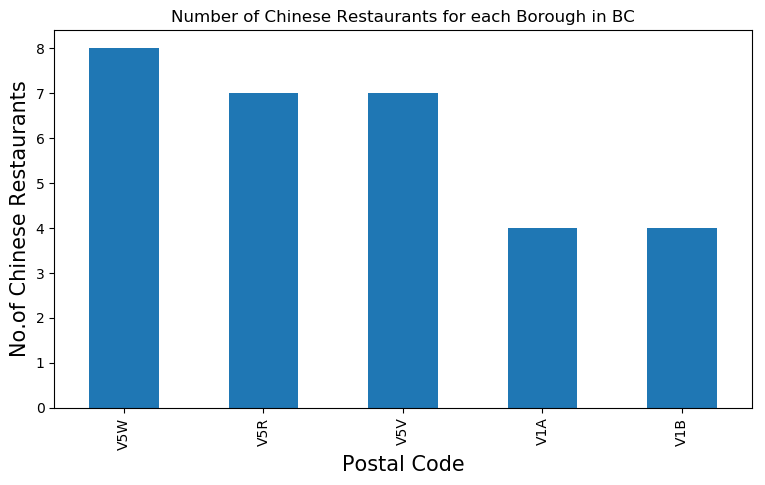

In [100]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Chinese Restaurants for each Borough in BC')
#On x-axis
plt.xlabel('Postal Code', fontsize = 15)
#On y-axis
plt.ylabel('No.of Chinese Restaurants', fontsize=15)
#giving a bar plot
bc_chinese_restaurants.groupby('Postal Code')['ID'].count().nlargest(5).plot(kind='bar')

#displays the plot
plt.show()

In [83]:
postal_codes_top5_chinese = bc_chinese_restaurants.groupby('Postal Code')['ID'].count().nlargest(5)

In [85]:
postal_codes_top5_chinese

Postal Code
V5W    8
V5R    7
V5V    7
V1A    4
V1B    4
Name: ID, dtype: int64

In [86]:
top5_chinese = postal_codes_top5.keys().values.tolist()

In [87]:
bc_chinese_restaurants[bc_chinese_restaurants['Postal Code'].isin(top5_chinese)]

,Postal Code,Neighborhood,ID,Name
68,V2A,Penticton,4ab04bfaf964a520ed6620e3,Peaceful Restaurant 和平饭店
69,V2A,Penticton,4aa6f0caf964a5208e4b20e3,Congee Noodle House 粥麵館 (Congee Noodle House)
70,V2A,Penticton,5158c39fe4b03dbb60d52ad6,Peaceful Restaurant 和平饭店
71,V2B,KamloopsNorthwest,4ab04bfaf964a520ed6620e3,Peaceful Restaurant 和平饭店
72,V2B,KamloopsNorthwest,4aa6f0caf964a5208e4b20e3,Congee Noodle House 粥麵館 (Congee Noodle House)
73,V2B,KamloopsNorthwest,5158c39fe4b03dbb60d52ad6,Peaceful Restaurant 和平饭店
74,V2C,KamloopsCentral and Southeast,4ab04bfaf964a520ed6620e3,Peaceful Restaurant 和平饭店
75,V2C,KamloopsCentral and Southeast,4aa6f0caf964a5208e4b20e3,Congee Noodle House 粥麵館 (Congee Noodle House)
76,V2C,KamloopsCentral and Southeast,5158c39fe4b03dbb60d52ad6,Peaceful Restaurant 和平饭店
101,V3B,Port CoquitlamCentral,4ab04bfaf964a520ed6620e3,Peaceful Restaurant 和平饭店


### Using the Foursquare API to get the associated data for each restaurant

In [88]:
# prepare neighborhood list that contains indian resturants
column_names=['Postal Code', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
bc_chinese_restaurants_stats=pd.DataFrame(columns=column_names)
count=1

for row in bc_chinese_restaurants.values.tolist():
    Postal_Code, Neighborhood, ID, Name=row
    try:
        venue_details = get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=', ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(bc_chinese_restaurants),')','processed')
    bc_chinese_restaurants_stats = bc_chinese_restaurants_stats.append({'Postal Code': Postal_Code,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID                         Name  Likes  Rating  Tips
0  4ae7afb2f964a52058ad21e3  Landmark Hot Pot House 春秋火鍋     31     6.8     9
( 1 / 235 ) processed
                         ID       Name  Likes  Rating  Tips
0  4ac7bf8ff964a52081b920e3  Corner 23     27     6.8    21
( 2 / 235 ) processed
                         ID                    Name  Likes  Rating  Tips
0  4adbdddff964a520ec2a21e3  Café Gloucester 告羅士打餐廳     42     6.5    28
( 3 / 235 ) processed
                         ID                      Name  Likes  Rating  Tips
0  4dddece71f6e036947383d8a  Wang's Beef Noodle House      7     5.7     9
( 4 / 235 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4ae7afb2f964a52058ad21e3  Landmark Hot Pot House 春秋火鍋     31     6.8     9
( 5 / 235 ) processed
                         ID       Name  Likes  Rating  Tips
0  4ac7bf8ff964a52081b920e3  Corner 23     27     6.8    21
( 6 / 235 ) processed
                    

In [91]:
bc_chinese_restaurants_stats.head(10)

,Postal Code,Neighborhood,ID,Name,Likes,Rating,Tips
0,V1A,Kimberley,4ae7afb2f964a52058ad21e3,Landmark Hot Pot House 春秋火鍋,31,6.8,9
1,V1A,Kimberley,4ac7bf8ff964a52081b920e3,Corner 23,27,6.8,21
2,V1A,Kimberley,4adbdddff964a520ec2a21e3,Café Gloucester 告羅士打餐廳,42,6.5,28
3,V1A,Kimberley,4dddece71f6e036947383d8a,Wang's Beef Noodle House,7,5.7,9
4,V1B,VernonEast,4ae7afb2f964a52058ad21e3,Landmark Hot Pot House 春秋火鍋,31,6.8,9
5,V1B,VernonEast,4ac7bf8ff964a52081b920e3,Corner 23,27,6.8,21
6,V1B,VernonEast,4adbdddff964a520ec2a21e3,Café Gloucester 告羅士打餐廳,42,6.5,28
7,V1B,VernonEast,4dddece71f6e036947383d8a,Wang's Beef Noodle House,7,5.7,9
8,V1C,Cranbrook,4ae7afb2f964a52058ad21e3,Landmark Hot Pot House 春秋火鍋,31,6.8,9
9,V1C,Cranbrook,4ac7bf8ff964a52081b920e3,Corner 23,27,6.8,21


#### Likes and Tips are given a default data type of string, which we will change to float for comparison purposes

In [92]:
bc_chinese_restaurants_stats['Tips']=bc_chinese_restaurants_stats['Tips'].astype('float64')
bc_chinese_restaurants_stats['Likes']=bc_chinese_restaurants_stats['Likes'].astype('float64')

In [93]:
bc_chinese_restaurants_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 7 columns):
Postal Code     235 non-null object
Neighborhood    235 non-null object
ID              235 non-null object
Name            235 non-null object
Likes           235 non-null float64
Rating          235 non-null float64
Tips            235 non-null float64
dtypes: float64(3), object(4)
memory usage: 12.9+ KB


#### Most Liked Chinese Restaurant

In [94]:
bc_chinese_restaurants_stats.iloc[bc_chinese_restaurants_stats['Likes'].idxmax()]

Postal Code                                                   V6A
Neighborhood    Vancouver(Strathcona / Chinatown / Downtown Ea...
ID                                       4b513a38f964a5200b4827e3
Name                                                      Bao Bei
Likes                                                         209
Rating                                                        8.7
Tips                                                           83
Name: 184, dtype: object

#### Highest rated Chinese Restaurant

In [95]:
bc_chinese_restaurants_stats.iloc[bc_chinese_restaurants_stats['Rating'].idxmax()]

Postal Code                                                   V6A
Neighborhood    Vancouver(Strathcona / Chinatown / Downtown Ea...
ID                                       4b513a38f964a5200b4827e3
Name                                                      Bao Bei
Likes                                                         209
Rating                                                        8.7
Tips                                                           83
Name: 184, dtype: object

#### Chinese Restaurant with the most tips

In [96]:
bc_chinese_restaurants_stats.iloc[bc_chinese_restaurants_stats['Tips'].idxmax()]

Postal Code                                                   V6A
Neighborhood    Vancouver(Strathcona / Chinatown / Downtown Ea...
ID                                       4b513a38f964a5200b4827e3
Name                                                      Bao Bei
Likes                                                         209
Rating                                                        8.7
Tips                                                           83
Name: 184, dtype: object

#### Averages of Chinese restaurant ratings for each Neighborhood

In [97]:
bc_chinese_restaurants_stats=bc_chinese_restaurants_stats.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
bc_chinese_restaurants_stats.columns=['Neighborhood','Average Rating']

In [98]:
bc_chinese_restaurants_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
57,Vancouver(Strathcona / Chinatown / Downtown Ea...,8.150000
59,Vancouver(West Fairview / Granville Island / N...,8.100000
45,Vancouver(NW Shaughnessy / East Kitsilano / Qu...,8.100000
22,Penticton,7.933333
23,Port CoquitlamCentral,7.933333
24,Port CoquitlamSouth,7.933333
9,KamloopsCentral and Southeast,7.933333
10,KamloopsNorthwest,7.933333
43,Vancouver(East Mount Pleasant),7.650000
52,Vancouver(SE West End / Davie Village),7.600000


#### Q3: Neighborhoods with average ratings of Chinese restaurants > 8.0

In [116]:
bc_chinese_restaurants_stats=bc_chinese_restaurants_stats[bc_chinese_restaurants_stats['Average Rating']>=8.0]


In [117]:
bc_chinese_restaurants_stats

,Neighborhood,Average Rating
45,Vancouver(NW Shaughnessy / East Kitsilano / Qu...,8.10
57,Vancouver(Strathcona / Chinatown / Downtown Ea...,8.15
59,Vancouver(West Fairview / Granville Island / N...,8.10


#### Merging the dataframe with longitude and latitude with the average ratings

In [118]:
bc_chinese_restaurants_stats=pd.merge(bc_chinese_restaurants_stats, vancouver, on='Neighborhood')

In [119]:
bc_chinese_restaurants_stats=bc_chinese_restaurants_stats[['Postal Code','Neighborhood','Latitude','Longitude','Average Rating']]

In [120]:
bc_chinese_restaurants_stats

,Postal Code,Neighborhood,Latitude,Longitude,Average Rating
0,V6J,Vancouver(NW Shaughnessy / East Kitsilano / Qu...,49.261613,-123.145796,8.10
1,V6A,Vancouver(Strathcona / Chinatown / Downtown Ea...,49.276019,-123.099793,8.15
2,V6H,Vancouver(West Fairview / Granville Island / N...,49.257747,-123.132920,8.10


In [123]:
bc_map = folium.Map(location=[vancity_lat,vancity_lng], zoom_start=12)

### Q4:Plotting these Neighborhoods with a label for the average ratings for Indian and Chinese restaurants

In [124]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the neighborhood and add each to the feature group
for lat, lng, in bc_indian_restaurants_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [132]:
bc_indian_restaurants_stats['Label']=bc_indian_restaurants_stats['Neighborhood']+', '+bc_indian_restaurants_stats['Postal Code']+'('+bc_indian_restaurants_stats['Average Rating'].map(str)+')'

# add pop-up text to each marker on the map
for lat, lng, label in bc_indian_restaurants_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(bc_map)        
# add incidents to map
bc_map.add_child(incidents)


In [127]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the neighborhood and add each to the feature group
for lat, lng, in bc_chinese_restaurants_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [128]:
bc_chinese_restaurants_stats['Label']=bc_chinese_restaurants_stats['Neighborhood']+', '+bc_chinese_restaurants_stats['Postal Code']+'('+bc_chinese_restaurants_stats['Average Rating'].map(str)+')'

# add pop-up text to each marker on the map
for lat, lng, label in bc_chinese_restaurants_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(bc_map)        
# add incidents to map
bc_map.add_child(incidents)

In [137]:
bc_indian_restaurants_stats

,Postal Code,Neighborhood,Latitude,Longitude,Average Rating,Label
0,V9W,Campbell RiverCentral,49.249660,-123.119340,8.80,"Campbell RiverCentral, V9W(8.8)"
1,V1N,Castlegar,49.249660,-123.119340,8.80,"Castlegar, V1N(8.8)"
2,V1C,Cranbrook,49.249660,-123.119340,8.80,"Cranbrook, V1C(8.8)"
3,V1G,Dawson Creek,49.249660,-123.119340,8.80,"Dawson Creek, V1G(8.8)"
4,V1J,Fort St. John,49.249660,-123.119340,8.80,"Fort St. John, V1J(8.8)"
5,V2C,KamloopsCentral and Southeast,49.260872,-123.113953,8.40,"KamloopsCentral and Southeast, V2C(8.4)"
6,V2B,KamloopsNorthwest,49.260872,-123.113953,8.40,"KamloopsNorthwest, V2B(8.4)"
7,V1S,KamloopsSouthwest,49.249660,-123.119340,8.80,"KamloopsSouthwest, V1S(8.8)"
8,V1Y,KelownaCentral,49.249660,-123.119340,8.80,"KelownaCentral, V1Y(8.8)"
9,V1P,KelownaEast,49.249660,-123.119340,8.80,"KelownaEast, V1P(8.8)"


In [135]:
bc_chinese_restaurants_stats

,Postal Code,Neighborhood,Latitude,Longitude,Average Rating,Label
0,V6J,Vancouver(NW Shaughnessy / East Kitsilano / Qu...,49.261613,-123.145796,8.10,Vancouver(NW Shaughnessy / East Kitsilano / Qu...
1,V6A,Vancouver(Strathcona / Chinatown / Downtown Ea...,49.276019,-123.099793,8.15,Vancouver(Strathcona / Chinatown / Downtown Ea...
2,V6H,Vancouver(West Fairview / Granville Island / N...,49.257747,-123.132920,8.10,Vancouver(West Fairview / Granville Island / N...


### Q5:The zipcode Z6J, i.e. the Neighborhoods of Shaughnessy/ East Kitsilano/ Quilchena are common to both Indian and Chinese restaurants, and likely to be visited by immigrants from both countries.